# Building an Ibor Single Curve

Constructing an Ibor Single Curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.funding import *

####################################################################
# FINANCEPY BETA Version 0.184 - This build:  19 Oct 2020 at 09:55 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Creating the Libor Instruments

In [3]:
valuationDate = FinDate(18, 9, 2019)

### Load up the deposits first

In [4]:
depoDCCType = FinDayCountTypes.THIRTY_E_360_ISDA
depos = []

spotDays = 2
settlementDate = valuationDate.addWeekDays(spotDays)

depositRate = 0.050
maturityDate = settlementDate.addMonths(1)
depo = FinIborDeposit(settlementDate, maturityDate, depositRate, depoDCCType)
depos.append(depo)

maturityDate = settlementDate.addMonths(3)
depo = FinIborDeposit(settlementDate, maturityDate, depositRate, depoDCCType)
depos.append(depo)

maturityDate = settlementDate.addMonths(6)
depo = FinIborDeposit(settlementDate, maturityDate, depositRate, depoDCCType)
depos.append(depo)

maturityDate = settlementDate.addMonths(9)
depo = FinIborDeposit(settlementDate, maturityDate, depositRate, depoDCCType)
depos.append(depo)

maturityDate = settlementDate.addMonths(12)
depo = FinIborDeposit(settlementDate, maturityDate, depositRate, depoDCCType)
depos.append(depo)

### Then we load up the FRAs

In [5]:
# 1 x 4 FRA
payFixed = True
notional = 1000
fras = []

fraRate = 0.05
fraSettlementDate = settlementDate.addMonths(12)
fraMaturityDate = settlementDate.addMonths(16)
fra = FinIborFRA(fraSettlementDate, fraMaturityDate, fraRate, depoDCCType)
fras.append(fra)

# 4 x 7 FRA
fraRate = 0.08
fraSettlementDate = settlementDate.addMonths(16)
fraMaturityDate = settlementDate.addMonths(20)
fra = FinIborFRA(fraSettlementDate, fraMaturityDate, fraRate, depoDCCType)
fras.append(fra)

### Then we load up swap rates

In [6]:
swaps = []
fixedDCCType = FinDayCountTypes.ACT_365F
fixedFreqType = FinFrequencyTypes.SEMI_ANNUAL
swapType = FinSwapTypes.PAYER

swapRate = 0.050
maturityDate = settlementDate.addMonths(24)
swap = FinIborSwap(settlementDate, maturityDate, swapType, swapRate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swapRate = 0.052
maturityDate = settlementDate.addMonths(36)
swap = FinIborSwap(settlementDate, maturityDate, swapType, swapRate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swapRate = 0.0535
maturityDate = settlementDate.addMonths(48)
swap = FinIborSwap(settlementDate, maturityDate, swapType, swapRate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swapRate = 0.055
maturityDate = settlementDate.addMonths(60)
swap = FinIborSwap(settlementDate, maturityDate, swapType, swapRate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swapRate = 0.0565
maturityDate = settlementDate.addMonths(84)
swap = FinIborSwap(settlementDate, maturityDate, swapType, swapRate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swapRate = 0.057
maturityDate = settlementDate.addMonths(120)
swap = FinIborSwap(settlementDate, maturityDate, swapType, swapRate, fixedFreqType, fixedDCCType)
swaps.append(swap)

In [7]:
liborCurve = FinIborSingleCurve(settlementDate, depos, fras, swaps)

## Check Repricing

In [8]:
for depo in depos:
    v = depo.value(settlementDate, liborCurve)
    print("Depo Value: %10.6f"% v)

Depo Value: 100.000000
Depo Value: 100.000000
Depo Value: 100.000000
Depo Value: 100.000000
Depo Value: 100.000000


In [9]:
for fra in fras:
    v = fra.value(settlementDate, liborCurve)
    print("FRA Value: %10.6f"% v)

FRA Value:   0.000000
FRA Value:  -0.000000


In [13]:
for swap in swaps:
    v = swap.value(settlementDate, liborCurve)
    print("Swap Value: %12.8f" % v)

Swap Value:  -0.00000000
Swap Value:   0.00000000
Swap Value:  -0.00000000
Swap Value:  -0.00000000
Swap Value:   0.00000000
Swap Value:  -0.00000000


## Curve Examination

Generate a vector of time points and then generate zero rates and forward rates

In [11]:
years = np.linspace(0.01,10,500)
dates = settlementDate.addYears(years)
zeroRates = liborCurve.zeroRate(dates)
fwdRates = liborCurve.fwd(dates)

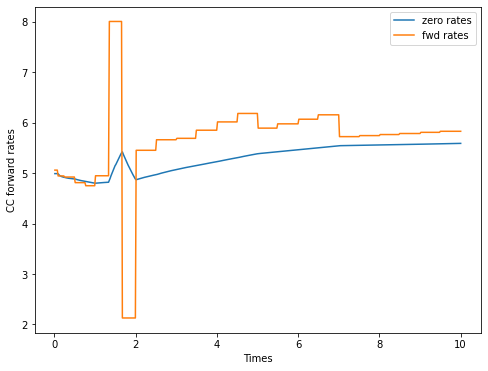

In [12]:
plt.figure(figsize=(8,6))
plt.plot(years, zeroRates*100, label="zero rates")
plt.plot(years, fwdRates*100, label = "fwd rates")
plt.xlabel("Times")
plt.ylabel("CC forward rates")
plt.legend();

We see that the forward rates are piecewise flat